In [1]:
using JuMP,Ipopt, LinearAlgebra, ControlSystems

In [2]:
my_optimizer = with_optimizer(Ipopt.Optimizer, print_level = 0)

MathOptInterface.OptimizerWithAttributes(Ipopt.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[MathOptInterface.RawParameter("print_level") => 0])

In [3]:
begin
    const c1 = 1; # Spring constant
    const c2 = 1;
    const c3 = 1;
    const m1 = 5.0; # Mass
    const m2 = 5.0;
    const m3 = 5.0;
    const m4 = 5.0;
 
end

5.0

In [4]:
A = [0 0 0 0 1 0 0 0; 0 0 0 0 0 1 0 0 ; 0 0 0 0 0 0 1 0 ; 0 0 0 0 0 0 0 1 ; -c1/m1 c1/m1 0 0 0 0 0 0 ; c1/m2 -(c2+c1)/m2 c2/m2 0 0 0 0 0 ; 0 c2/m3 -(c2+c3)/m3 c3/m3 0 0 0 0 ; 0 0 c3/m4 -c3/m4 0 0 0 0]

8×8 Matrix{Float64}:
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0

In [5]:
B = [0 0 0 0 ; 0 0 0 0 ; 0 0 0 0; 0 0 0 0; 1/m1 0 0 0 ; 0 1/m2 0 0; 0 0 1/m3 0 ; 0 0 0 1/m4] # Input matrix


8×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2

In [6]:
C = [1 0 0 0 0 0 0 0 ; 0 1 0 0 0 0 0 0 ; 0 0 1 0 0 0 0 0; 0 0 0 1 0 0 0 0 ; ] # Output matrix


4×8 Matrix{Int64}:
 1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0

In [7]:
sys_c = ss( A, B, C, zeros(4,4) )


StateSpace{Continuous, Float64}
A = 
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0
B = 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2
C = 
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
D = 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

Continuous-time state-space model

In [8]:
Ts = 0.1
sys_d = c2d(sys_c, Ts)

StateSpace{Discrete{Float64}, Float64}
A = 
  0.9990003332777834       0.0009995000999888902   1.6661111904696678e-7   1.1108730387993082e-11  0.09996667333253974     3.332333476178134e-5   3.3325397707171583e-9  1.587037057961754e-13
  0.00099950009998889      0.9980009997889134      0.0009993334999785736   1.666111190469667e-7    3.332333476178133e-5    0.09993335333031773    3.332000238071431e-5   3.3325397707171546e-9
  1.6661111904696675e-7    0.000999333499978573    0.9980009997889134      0.0009995000999888897   3.3325397707171575e-9   3.3320002380714325e-5  0.09993335333031773    3.332333476178132e-5
  1.1108730387993066e-11   1.6661111904696656e-7   0.00099950009998889     0.9990003332777833      1.5870370579617432e-13  3.332539770717151e-9   3.332333476178132e-5   0.09996667333253974
 -0.019986669999555597     0.0199800059991112      6.663333968188722e-6    6.664762134022716e-10   0.9990003332777835      0.0009995000999888902  1.6661111904696675e-7  1.1108730387993102e-11
  0

In [9]:
Ad = sys_d.A 
Bd = sys_d.B
Cd = sys_d.C

4×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [10]:
Nx = size(Ad) # size(A) == size(Ad) -> 8x8 -> Nx=8 
Ny = size(Cd) # Number of outputs
Nu = size(Bd)

(8, 4)

In [11]:
Id8 =1* Matrix(I, 4, 4)
p = zeros(Int8, 8, 4)
R = C*Ad
Ã = [Ad p ; R Id8]

12×12 Matrix{Float64}:
  0.999         0.0009995     1.66611e-7   …  1.58704e-13  0.0  0.0  0.0  0.0
  0.0009995     0.998001      0.000999333     3.33254e-9   0.0  0.0  0.0  0.0
  1.66611e-7    0.000999333   0.998001        3.33233e-5   0.0  0.0  0.0  0.0
  1.11087e-11   1.66611e-7    0.0009995       0.0999667    0.0  0.0  0.0  0.0
 -0.0199867     0.01998       6.66333e-6      1.11087e-11  0.0  0.0  0.0  0.0
  0.01998      -0.03996       0.0199733    …  1.66611e-7   0.0  0.0  0.0  0.0
  6.66333e-6    0.0199733    -0.03996         0.0009995    0.0  0.0  0.0  0.0
  6.66476e-10   6.66333e-6    0.01998         0.999        0.0  0.0  0.0  0.0
  0.999         0.0009995     1.66611e-7      1.58704e-13  1.0  0.0  0.0  0.0
  0.0009995     0.998001      0.000999333     3.33254e-9   0.0  1.0  0.0  0.0
  1.66611e-7    0.000999333   0.998001     …  3.33233e-5   0.0  0.0  1.0  0.0
  1.11087e-11   1.66611e-7    0.0009995       0.0999667    0.0  0.0  0.0  1.0

In [12]:
B̃ = [Bd ; C*Bd]

12×4 Matrix{Float64}:
 0.000999833  1.66633e-7   1.11091e-11  3.96772e-16
 1.66633e-7   0.000999667  1.66622e-7   1.11091e-11
 1.11091e-11  1.66622e-7   0.000999667  1.66633e-7
 3.96772e-16  1.11091e-11  1.66633e-7   0.000999833
 0.0199933    6.66467e-6   6.66508e-10  3.17407e-14
 6.66467e-6   0.0199867    6.664e-6     6.66508e-10
 6.66508e-10  6.664e-6     0.0199867    6.66467e-6
 3.17407e-14  6.66508e-10  6.66467e-6   0.0199933
 0.000999833  1.66633e-7   1.11091e-11  3.96772e-16
 1.66633e-7   0.000999667  1.66622e-7   1.11091e-11
 1.11091e-11  1.66622e-7   0.000999667  1.66633e-7
 3.96772e-16  1.11091e-11  1.66633e-7   0.000999833

In [13]:
 C̃ = hcat(zeros(Ny), diagm(ones(4)))


4×12 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [14]:
mech_osc_mmpc(x,u) = Ã * x + B̃ * u # System dynamics in MMPC formulation

mech_osc_mmpc (generic function with 1 method)

In [15]:
function multiplexed_mpc_emo(z_init, u_last, σ)
    
    model = Model(my_optimizer)
    
    ΔT = 0.1            #  Sampling time
    n_horizon = 20;     # MPC horizon
    
   
    Nz = size(Ã)[1] # Number of states z
    Nu = size(B̃)[2]
    Ny = size(C̃)[1] # Number of outputs
    
    
    # Input constraints
    Δumin = -100.0
    Δumax = 100.0 
    
    ref = [0.0, 0.0, 0.0, 0.0] # Reference 
    
    @variables model begin
        # x[1: Nx, 1:n_horizon]    # States
        y[1: Ny, 1:n_horizon] # Output
        z[1:Nz, 1:n_horizon] # New state
        
        e[1:Ny, 1:n_horizon]    # Errors = Reference - Outputs
        
        Δu[1:Nu, 1:(n_horizon-1)]
        
        
        #Δx[1:Nu, 1:(n_horizon-1)]
    end
    
    for i = 1 : Nu
        if i == σ
            @constraint(model, Δumin .<= Δu[i, 1:(n_horizon-1)] .<= Δumax)
        else
            @constraint(model, Δu[i, 1:(n_horizon-1)] .== u_last[i])
        end
    end

    #@constraint(model, x[1:Nx, 1] .== x_init )    # Initial values

    # Δumin <= Δu[1:Nu, 1:(n_horizon-1)] <= Δumax  # Input constraints

    @constraint(model, z[1:Nz, 1] .== z_init)
    # @constraint(model, Δu[1:Nu,1] .== 0) # We have to think about this constraint

    for i = 1 : n_horizon
        @constraint(model, y[1:Ny, i] .== C̃ * z[1:Nz, i] )  # Output y(n) = C̃ z(n)  
    end
    
    
    
    @constraint(model, [k=1:n_horizon], e[:, k] .== ref[:] - y[:, k])   # Error = Reference - States
    @constraint(model, [k=1:n_horizon-1], z[:, k+1] .==  mech_osc_mmpc(z[:,k], Δu[:,k])) # System dynamics with new state
    # Old: J = @NLexpression(model, 100*sum(e[i,end]^2 for i in 1:Nx) + sum(u[j,end]^2 for j in 1:Nu) )
    # New

    J_err = @NLexpression(model, 100*sum(e[n,k]^2 for n=1:Ny, k=1:n_horizon))
    J_in = @NLexpression(model, sum(Δu[j,k]^2 for j = 1:Nu, k = 1:n_horizon-1))

    #J = @NLexpression(model, 100*sum(sum(e[n,k]^2 for n in 1:Nx) for k in 1:n_horizon) + sum(sum(Δu[j,k]^2 for j in 1:Nu) for k in 1:n_horizon-1) )

    J = @NLexpression(model, J_err + J_in )

    @NLobjective( model, Min, J)
    
    optimize!(model)
    #Old: return JuMP.value.(x), JuMP.value.(u), JuMP.value.(e)
    return JuMP.value.(z), JuMP.value.(Δu), JuMP.value.(e)
end



multiplexed_mpc_emo (generic function with 1 method)

In [16]:
Δx_val = zeros(8,49)
using JLD
x_val = load("data.jld")["data"]

8×50 Matrix{Float64}:
  1.0           0.992192      0.970344     …  -0.0109645    -0.00993288
  0.0          -4.84571e-5   -0.000121897      0.00196081    0.00155029
  0.0          -3.30724e-5   -0.000124651      0.000348126   0.000373793
  0.0           7.48945e-7    3.05422e-6      -9.12503e-5   -8.818e-5
 -4.343e-26    -0.156139     -0.280742         0.0104591     0.0101683
 -7.18283e-28  -0.00099496   -0.000546496  …  -0.00431516   -0.00388887
  3.22452e-27  -0.000661386  -0.00116982       0.000290419   0.000221398
  1.76206e-28   1.48661e-5    3.09263e-5       2.82171e-5    3.32648e-5

In [17]:
for i in 1:49
    Δx_val[:, i] = x_val[:, i+1] - x_val[:, i]
end
    

In [18]:
ypos = Cd * x_val
ypos = ypos[:,1:end-1]

4×49 Matrix{Float64}:
 1.0   0.992192     0.970344      0.937415     …  -0.0120183    -0.0109645
 0.0  -4.84571e-5  -0.000121897  -0.000101621      0.00241447    0.00196081
 0.0  -3.30724e-5  -0.000124651  -0.000260644      0.000315315   0.000348126
 0.0   7.48945e-7   3.05422e-6    6.94724e-6      -9.37808e-5   -9.12503e-5

In [19]:
zpos = vcat(Δx_val,ypos)

12×49 Matrix{Float64}:
 -0.00780825   -0.0218477    -0.0329288    …   0.0010538     0.00103161
 -4.84571e-5   -7.34403e-5    2.02765e-5      -0.000453666  -0.000410515
 -3.30724e-5   -9.15789e-5   -0.000135993      3.28111e-5    2.56674e-5
  7.48945e-7    2.30527e-6    3.89302e-6       2.53042e-6    3.07033e-6
 -0.156139     -0.124603     -0.0969826       -0.000152841  -0.000290766
 -0.00099496    0.000448464   0.00138816   …   0.000436351   0.000426292
 -0.000661386  -0.000508429  -0.000379239     -7.36612e-5   -6.9021e-5
  1.48661e-5    1.60602e-5    1.55415e-5       5.72474e-6    5.04776e-6
  1.0           0.992192      0.970344        -0.0120183    -0.0109645
  0.0          -4.84571e-5   -0.000121897      0.00241447    0.00196081
  0.0          -3.30724e-5   -0.000124651  …   0.000315315   0.000348126
  0.0           7.48945e-7    3.05422e-6      -9.37808e-5   -9.12503e-5

In [20]:
u_hist = zeros(4,0)
z_hist = zeros(12,0)

12×0 Matrix{Float64}

In [21]:
zpos_new = zpos[:,1]

12-element Vector{Float64}:
 -0.007808246744595793
 -4.845713168491082e-5
 -3.307242355244581e-5
  7.489446194138775e-7
 -0.15613906720364776
 -0.000994959902310029
 -0.0006613861469649292
  1.4866148646285156e-5
  1.0
  0.0
  0.0
  0.0

In [22]:
# zpos_new = 2*rand(12) # Only for testing
# zpos_new = zeros(12) # Only for testing
# zpos_new[9] = 1

In [23]:
zpos_new

12-element Vector{Float64}:
 -0.007808246744595793
 -4.845713168491082e-5
 -3.307242355244581e-5
  7.489446194138775e-7
 -0.15613906720364776
 -0.000994959902310029
 -0.0006613861469649292
  1.4866148646285156e-5
  1.0
  0.0
  0.0
  0.0

In [24]:
zpos_plan_last = zeros(length(zpos_new),20)
u_plan_last = zeros(4,19)

4×19 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [25]:
8 % 4

0

In [26]:
Nu[2]

4

In [27]:
for i = 1 : 50
    n_in = (i % Nu[2]) + 1

    z_plan, Δu_plan, e_plan = multiplexed_mpc_emo(zpos_new, u_plan_last[:,1], n_in)
    z_hist = hcat(z_hist, z_plan[:,1])
    u_hist = hcat(u_hist, Δu_plan[:,1])
    zpos_new = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
    zpos_plan_last = z_plan
    u_plan_last = Δu_plan 
end


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



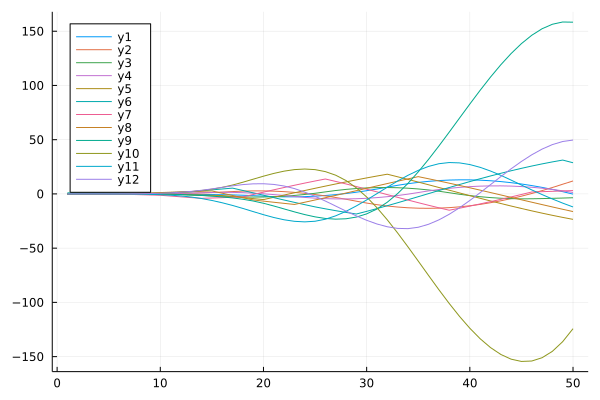

In [61]:
plot(z_hist', legend =:topleft)

In [29]:
#savefig("MMPCZ")

In [62]:
u_hist

4×50 Matrix{Float64}:
  6.16298e-33   6.16222e-33   6.16218e-33  …  -100.0      -100.0      -100.0
  1.14719       1.14719       1.14719          100.0      -100.0      -100.0
 -1.32669e-30  -1.71008      -1.71008           -1.23008    -1.23008   100.0
 -4.93101e-32  -4.93106e-32   2.73847         -100.0      -100.0      -100.0

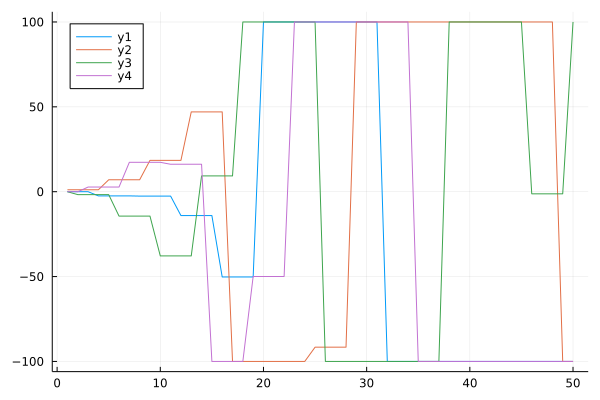

In [63]:
plot(u_hist', legend =:topleft)

In [32]:
savefig("mmpcu")

LoadError: UndefVarError: savefig not defined

In [33]:
plot(zpos_plan_last')

LoadError: UndefVarError: plot not defined

In [34]:
plot(u_plan_last')

LoadError: UndefVarError: plot not defined

In [35]:
z_plan, Δu_plan, e_plan = mpc_emo(zpos[:,1])

LoadError: UndefVarError: mpc_emo not defined

In [36]:
plot(z_plan')

LoadError: UndefVarError: z_plan not defined

In [37]:
plot(Δu_plan')

LoadError: UndefVarError: Δu_plan not defined

In [38]:
Δu_plan

LoadError: UndefVarError: Δu_plan not defined

In [39]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])

LoadError: UndefVarError: z_plan not defined

In [40]:
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

LoadError: UndefVarError: mpc_emo not defined

In [41]:
plot(z_plan')

LoadError: UndefVarError: z_plan not defined

In [42]:
Δu_plan

LoadError: UndefVarError: Δu_plan not defined

In [43]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

LoadError: UndefVarError: z_plan not defined

In [44]:
plot(z_plan')

LoadError: UndefVarError: z_plan not defined

In [45]:
plot(Δu_plan')

LoadError: UndefVarError: Δu_plan not defined

In [46]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

LoadError: UndefVarError: z_plan not defined

In [47]:
plot(z_plan')

LoadError: UndefVarError: z_plan not defined

In [55]:
plot(Δu_plan')

LoadError: UndefVarError: Δu_plan not defined

In [56]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

LoadError: UndefVarError: z_plan not defined

In [57]:
plot(z_plan')

LoadError: UndefVarError: z_plan not defined

In [58]:
for i in 1:49
    
    # Run the MPC control optimization
    #x_plan, u_plan, e_plan = mpc_emo(xpos)
    
    z_plan, Δu_plan, e_plan = mpc_emo(zpos[:,i])
    
    # Save states
    z_hist = hcat(z_hist, z_plan[:,1])
    u_hist = hcat(u_hist, Δu_plan)
    # Apply the planned input signals and simulate one step in time
    
     #zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
end

LoadError: UndefVarError: mpc_emo not defined

In [59]:
u_hist

4×50 Matrix{Float64}:
  6.16298e-33   6.16222e-33   6.16218e-33  …  -100.0      -100.0      -100.0
  1.14719       1.14719       1.14719          100.0      -100.0      -100.0
 -1.32669e-30  -1.71008      -1.71008           -1.23008    -1.23008   100.0
 -4.93101e-32  -4.93106e-32   2.73847         -100.0      -100.0      -100.0

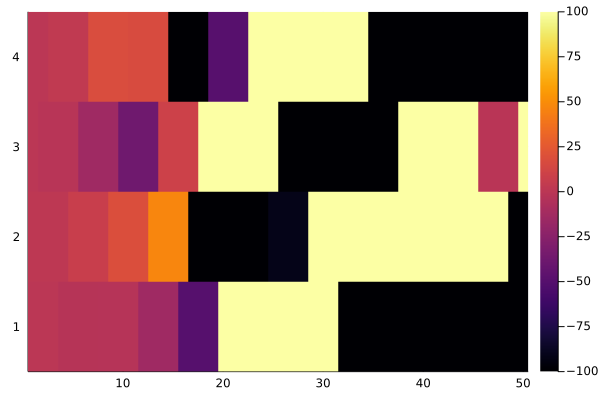

In [60]:
using Plots
heatmap(u_hist)

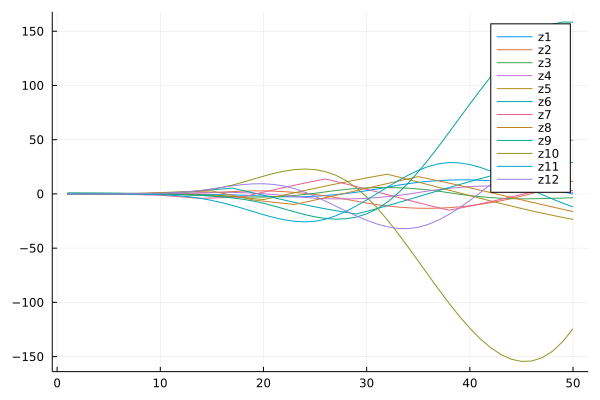

In [54]:

plot(z_hist', labels=["z1" "z2" "z3" "z4" "z5" "z6" "z7" "z8" "z9" "z10" "z11" "z12"])